# Final Project NLP

Sirinda Leesuravanich (Pang)

My approach for this project includes:
1. Data preprocessing: remove HTML and excess white space
2. Unsupervised topic modeling: Bertopic from title only
3. Remove unirrelevant topics
4. Detect major topics and draw connections to different industries / jobs --> which model?
5. Conduct Sentiment analysis, comparing in each industries
6. Identify technologies and AI solutions that might be affecting the employment landscape --> which model?
7. Demonstrate what companies, academic institutions, and government entities can do to accelerate the development of these transformative capabilities --> which model?
8. 
What types of companies are planning to invest in these technologies today or near future (success stories)?
What types of applications cannot by transformed by AI, based on the state of technology (failures)?
Can you provide text extracts / summarizations that support the answers to the above questions?
--> Sentiment in each topics + summarize model

Default sentiment will likely be wrong from any out-of-the-box package and will require a custom approach
Use sentiment lexicons if helpful
Custom models (transformer-based or not) should be trained on data that is somewhat similar to your project data
You can either find open source labeled data online, or get GPT3.5 (or GPT 4 if your mortgage is paid off and you're set for retirement) to label some for you. NOTE: you may not use any other models to label your data.
You may use any combination of techniques to identify key topics:
Topic modeling
Custom classification model
Zero-shot modeling using transformer models

1 preprocessing
2 bertopic 
3 remove irrelevant topic
4 classify industries
5 keyword extraction in each industry
6 sentiment (customize)


In [1]:
import pandas as pd
import numpy as np
import re

In [2]:

df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

(200083, 5)

In [189]:
df_news_final_project['url'].nunique()  # 1000

200083

In [2]:
df_news_final_project.head(6)

,url,date,language,title,text
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,en,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry:...
5,https://citylife.capetown/iw/uncategorized/cou...,2023-12-10,en,האם AI ובן אדם יכולים להתאהב?,האם AI ובן אדם יכולים להתאהב? \n \n\nעבור...


In [3]:
df_news_final_project['title'][0]

'Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week'

In [4]:
df_news_final_project['text'][0]

'\n\nInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week\n\n\r\n\t\t\tBusiness News \n\n \n\n\r\n                        \t[ May 20, 2023 ]                        \n\r\n\t\t\t\t\t\t\tCourtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tBusiness\t\t\t\t\t\t\t\n\n \n\n\r\n                        \t[ May 20, 2023 ]                        \n\r\n\t\t\t\t\t\t\tDibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tentertainment\t\t\t\t\t\t\t\n\n \n\n\r\n                        \t[ May 20, 2023 ]                        \n\r\n\t\t\t\t\t\t\tExclusive Interview with Mr. Subroto Sen, CEO, GenY Medium\t\t\t\t\t\t\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tinterview\t\t\t\t\t\t\t\n\n \n\n\r\n                        \t[ May 20, 2023 ]                        \n\r\n\t\t\t\t\t\t\tNGEL and HMEL tie up to co

In [5]:
df_news_final_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200083 entries, 0 to 200082
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       200083 non-null  object
 1   date      200083 non-null  object
 2   language  200083 non-null  object
 3   title     200083 non-null  object
 4   text      200083 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


In [3]:
df_news_final_project['date'] = pd.to_datetime(df_news_final_project['date'], format='%Y-%m-%d')

In [7]:
df_news_final_project['date'].max(),df_news_final_project['date'].min()

(Timestamp('2025-04-28 00:00:00'), Timestamp('2022-01-01 00:00:00'))

In [8]:
df_news_final_project['language'].value_counts()

language
en    200083
Name: count, dtype: int64

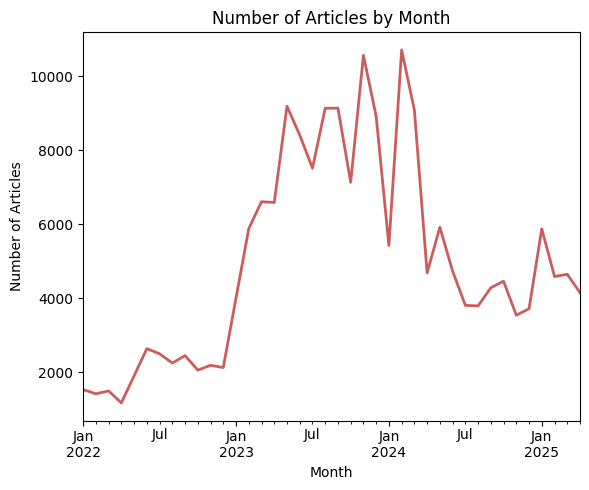

In [11]:
import matplotlib.pyplot as plt
df_news_final_project['month'] = df_news_final_project['date'].dt.to_period('M')
industry_time = df_news_final_project.groupby('month').size()
# Plot Line Chart
plt.figure(figsize=(6, 5))
industry_time.plot(kind='line', linewidth=2,color='indianred')
plt.title("Number of Articles by Month")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [ ]:
#!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993284 sha256=9a74d6a278ade7a8859bc40f2b1ea59a4ec451dc55551064558af7caf8629ce1
  Stored in directory: /Users/sirindalee/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  


def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
    

def clean_article_text(text):
    if not isinstance(text, str):
        return ""
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').replace('\xa0', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    
    # footer_keywords = [
    # "newsletter", "copyright", "subscribe", "privacy policy", "contact us", "tagged:",
    # "terms of use", "all rights reserved", "about us", "advertise", "submit", "comments",
    # "related articles", "share this", "social media", "follow us", "trending topics",
    # "report abuse", "press release", "agency news", "sponsored", "external link",
    # "posted by", "author bio", "login", "sign up", "site map", "cookie", "settings",
    # "read more", "skip to content", "powered by", "latest stories", "view original content"
    # ]
    # # for keyword in footer_keywords:
    # #     if keyword.lower() in text[-1000:].lower():  # check last portion only
    # #         text = text[:text.lower().rfind(keyword)]

    # lowered_text = text.lower()
    # for keyword in footer_keywords:
    #     if keyword in lowered_text[-1500:]:  
    #         cut_index = lowered_text.rfind(keyword)
    #         if cut_index > 300:  
    #             text = text[:cut_index]
    #             break
    text = re.sub(r'\s+', ' ', text).strip()

    if not is_english(text):
        return ""
    return text


def clean_title(title):
    if not isinstance(title, str):
        return ""
    title = title.replace('\xa0', ' ').strip()
    title = re.sub(r'^(\w+\s+\d{1,2},\s+\d{4}|[\d\-]{8,})\s*[–\-|:]\s*', '', title)

    parts = re.split(r'\s[\-|–|:|]\s', title)
    if len(parts) > 1 and len(parts[-1].split()) <= 3:
        title = ' - '.join(parts[:-1])  

    title = re.sub(r'\s+', ' ', title).strip()

    try:
        if detect(title) != "en":
            return ""
    except:
        return ""
    return title

In [10]:
df_news_final_project['title_clean'] = df_news_final_project['title'].apply(clean_title)

In [11]:
df_news_final_project['text_clean'] = df_news_final_project['text'].apply(clean_article_text)

In [12]:
df_news_final_project.head(6)

,url,date,language,title,text,title_clean,text_clean
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...,Africa: AI Policies in Africa - Lessons From G...,Africa: AI Policies in Africa - Lessons From G...
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...,Yang Lan interviews academics on AI development,Yang Lan interviews academics on AI developmen...
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...,Commerce Nominee Promises Increased Domestic A...,Commerce Nominee Promises Increased Domestic A...
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,en,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry:...,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry: Th...
5,https://citylife.capetown/iw/uncategorized/cou...,2023-12-10,en,האם AI ובן אדם יכולים להתאהב?,האם AI ובן אדם יכולים להתאהב? \n \n\nעבור...,,האם AI ובן אדם יכולים להתאהב? עבור לתוכןשמש. 1...


In [13]:
df_news_final_project[df_news_final_project['text_clean'] == '']['title_clean'].head()

399                                                      
1795                                                     
1831                                                     
2025    Shugaban Google ya tabbatar da Bincike da AI R...
3074                                                     
Name: title_clean, dtype: object

In [14]:
df_news_final_project = df_news_final_project[(df_news_final_project['title_clean'] != '')\
                                              &(df_news_final_project['text_clean'] != '')].copy()
df_news_final_project.shape

(192706, 7)

In [15]:
df_news_final_project['text'][3]

'\nCommerce Nominee Promises Increased Domestic AI Production – MeriTalk\n\n \n\nHome\nNews\nEvents\nResearch\nSponsored Content\n\nAI\nCloud\nCyber\nData\n\n\nOpinion\nLinkedIn\nTwitter\nSearch for:\n\n \n\nMenu\n\nDetails\nBy: Andrew Rice\nFeb 3, 2025\n4:14 pm\nCommerce Nominee Promises Increased Domestic AI Production\nHoward Lutnick, President Donald Trump’s nominee to lead the Department of Commerce, promised to lead an agency that prioritizes domestic artificial intelligence manufacturing and reduces regulation for that manufacturing capability.\nSenators on the Committee of Commerce, Science, and Transportation grilled Lutnick on a wide range of issues including AI export controls and intellectual property protections on Jan. 29.\nThroughout, Lutnick emphasized an approach aimed at dramatically increasing domestic production and cutting back regulations to increase global competition in AI development.\n“Let’s just unleash America for the benefit of America,” Lutnick said. “We’v

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
def get_trailing_text(text, limit=1000):
    return text[-limit:].lower() if isinstance(text, str) else ""
trailing_parts = [get_trailing_text(text) for text in df_news_final_project["text_clean"]]

vectorizer = CountVectorizer(ngram_range=(2, 3), min_df=1, max_df=1.0)
X = vectorizer.fit_transform(trailing_parts)

ngrams = vectorizer.get_feature_names_out()
freq = X.sum(axis=0).A1
ngram_freq = sorted(zip(ngrams, freq), key=lambda x: -x[1])

ngram_df = pd.DataFrame(ngram_freq, columns=["phrase", "count"])


In [19]:
ngram_df.head(30)

,phrase,count
0,media group,108485
1,gray media,98479
2,gray media group,98479
3,privacy policy,81454
4,press release,68278
5,group inc,67074
6,media group inc,66379
7,contact us,63728
8,in the,63224
9,all rights,62563


In [ ]:
footer_keywords = [
    "subscribe", "privacy policy", "terms of use", "contact us", "about us",
    "related articles", "newsletter", "comments", "site map", "trending topics",
    "advertise", "login", "sign up", "posted by", "©", "how-to geek", "review geek",
    "lifesavvy", "buying guides", "latest reviews", "facebook", "twitter", "linkedin"
]

footer_keywords = [
        "about us", "privacy policy", "contact us", "sign in", "subscribe",
        "follow us", "buying guides", "published on", "feedback", "all rights reserved"
    ]

In [28]:
def clean_article_text_second(text):
    if not isinstance(text, str):
        return ""
    footer_keywords = [
        "newsletter", "copyright", "subscribe", "privacy policy", "contact us", "tagged:",
        "terms of use", "all rights reserved", "about us", "advertise", "submit", "comments",
        "related articles", "share this", "social media", "follow us", "trending topics",
        "report abuse", "press release", "agency news", "sponsored", "external link",
        "posted by", "author bio", "login", "sign up", "site map", "cookie", "settings",
        "read more", "skip to content", "powered by", "latest stories", "view original content",
        "media group", "gray media", "group inc", 
        "all rights", "rights reserved", "terms of", "public file", "gray television",
        "inc station", "station 2002", "news releases"
    ]
    lowered_text = text.lower()
    cutoff_idx = len(text)  # default: keep all text

    for keyword in footer_keywords:
        if keyword in lowered_text[-1500:]:
            idx = lowered_text.rfind(keyword)
            if idx > 300 and idx < cutoff_idx:
                cutoff_idx = idx

    text = text[:cutoff_idx]

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [35]:
clean_article_text_second(df_news_final_project['text_clean'][0])

'Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week Business News [ May 20, 2023 ] Courtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen Business [ May 20, 2023 ] Dibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next entertainment [ May 20, 2023 ] Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview [ May 20, 2023 ] NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen & synthesizing Green Chemicals Business [ May 20, 2023 ] Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Health Home Business Entrepreneurship World Home Improvement interview Press Releases NewsVoir Business Wire Listing PR Newswire contact us Digital Marketing About Business News This Week Privacy Policy Search for: HomeBusinessInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Business Solution

In [36]:
df_news_final_project['text_clean'][0]

'Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week Business News [ May 20, 2023 ] Courtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen Business [ May 20, 2023 ] Dibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next entertainment [ May 20, 2023 ] Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview [ May 20, 2023 ] NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen & synthesizing Green Chemicals Business [ May 20, 2023 ] Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Health Home Business Entrepreneurship World Home Improvement interview Press Releases NewsVoir Business Wire Listing PR Newswire contact us Digital Marketing About Business News This Week Privacy Policy Search for: HomeBusinessInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Business Solution

In [37]:
len(df_news_final_project['text_clean'][0]), len(clean_article_text_second(df_news_final_project['text_clean'][0]))

(4972, 4764)

In [38]:
df_news_final_project['text_clean'] = df_news_final_project['text_clean'].apply(clean_article_text_second)

In [40]:
df_news_final_project.head(6)

,url,date,language,title,text,title_clean,text_clean
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,en,Infogain AI Business Solutions Now Available i...,\n\nInfogain AI Business Solutions Now Availab...,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...
1,https://allafrica.com/stories/202504250184.html,2025-04-25,en,Africa: AI Policies in Africa - Lessons From G...,\nAfrica: AI Policies in Africa - Lessons From...,Africa: AI Policies in Africa - Lessons From G...,Africa: AI Policies in Africa - Lessons From G...
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,en,Yang Lan interviews academics on AI developmen...,\nYang Lan interviews academics on AI developm...,Yang Lan interviews academics on AI development,Yang Lan interviews academics on AI developmen...
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,en,Commerce Nominee Promises Increased Domestic A...,\nCommerce Nominee Promises Increased Domestic...,Commerce Nominee Promises Increased Domestic A...,Commerce Nominee Promises Increased Domestic A...
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,en,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry:...,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry: Th...
6,https://citylife.capetown/uncategorized/ai-cha...,2023-08-02,en,The Challenge of Falsehoods in AI Chatbots,\n\nThe Challenge of Falsehoods in AI Chatbots...,The Challenge of Falsehoods in AI Chatbots,The Challenge of Falsehoods in AI Chatbots Ski...


In [41]:
df_news_final_project['text_clean'][0]

'Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week Business News [ May 20, 2023 ] Courtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen Business [ May 20, 2023 ] Dibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next entertainment [ May 20, 2023 ] Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview [ May 20, 2023 ] NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen & synthesizing Green Chemicals Business [ May 20, 2023 ] Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Health Home Business Entrepreneurship World Home Improvement interview Press Releases NewsVoir Business Wire Listing PR Newswire contact us Digital Marketing About Business News This Week Privacy Policy Search for: HomeBusinessInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Business Solution

In [42]:
df_news_final_project.columns

Index(['url', 'date', 'language', 'title', 'text', 'title_clean',
       'text_clean'],
      dtype='object')

In [43]:
df_news_final_project[['url', 'date', 'title_clean',
       'text_clean']].to_csv('news_final_project_cleaned.csv', index=False)

## Filter irrelevant articles

In [4]:
df_news_final_project = pd.read_csv('news_final_project_cleaned.csv')
df_news_final_project.head(6)

,url,date,title_clean,text_clean
0,http://businessnewsthisweek.com/business/infog...,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...
1,https://allafrica.com/stories/202504250184.html,2025-04-25,Africa: AI Policies in Africa - Lessons From G...,Africa: AI Policies in Africa - Lessons From G...
2,https://asiatimes.com/2023/07/yang-lan-intervi...,2023-07-25,Yang Lan interviews academics on AI development,Yang Lan interviews academics on AI developmen...
3,https://cdn.meritalk.com/articles/commerce-nom...,2025-02-04,Commerce Nominee Promises Increased Domestic A...,Commerce Nominee Promises Increased Domestic A...
4,https://citylife.capetown/hmn/uncategorized/re...,2023-11-11,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry: Th...
5,https://citylife.capetown/uncategorized/ai-cha...,2023-08-02,The Challenge of Falsehoods in AI Chatbots,The Challenge of Falsehoods in AI Chatbots Ski...


In [6]:
df_news_final_project.sample(10)

,url,date,title_clean,text_clean
121141,https://www.kgns.tv/prnewswire/2022/04/08/live...,2022-04-09,LivePerson upgrades Conversation Assist to sup...,LivePerson upgrades Conversation Assist to sup...
185751,https://www.livemint.com/ai/artificial-intelli...,2023-11-14,Nvidia announces its top-end AI chip H200. A l...,Nvidia announces its top-end AI chip H200. A l...
170915,https://www.houston-today.com/news/online-roma...,2023-02-12,Online romance scammers may have a new wingman...,Online romance scammers may have a new wingman...
158177,https://www.wdtv.com/prnewswire/2023/04/19/hoc...,2023-04-19,Hocoos Launches Powerful AI Website Builder Th...,Hocoos Launches Powerful AI Website Builder Th...
37455,https://www.kawc.org/npr-news/2024-05-08/chatg...,2024-05-09,ChatGPT maker OpenAI exploring how to 'respons...,ChatGPT maker OpenAI exploring how to 'respons...
188093,https://www.tomshardware.com/software/video-ga...,2023-11-02,"Video Game Created Entirely With ChatGPT, DALL...","Video Game Created Entirely With ChatGPT, DALL..."
27007,https://www.wagmtv.com/prnewswire/2022/01/24/s...,2022-01-24,Silicon Labs Brings AI and Machine Learning to...,Silicon Labs Brings AI and Machine Learning to...
101248,https://www.01net.it/alerje-earns-1m-phase-ii-...,2023-09-08,Alerje Earns $1M Phase II SBIR NSF Award to Su...,Alerje Earns $1M Phase II SBIR NSF Award to Su...
187895,https://www.rawpixel.com/image/12629227/jupite...,2024-02-21,Jupiter backgrounds accessories accessory. AI ...,Jupiter backgrounds accessories accessory. AI ...
119925,https://www.northernpublicradio.org/2025-02-04...,2025-02-04,Why the AI world is suddenly obsessed with a 1...,Why the AI world is suddenly obsessed with a 1...


In [ ]:
ai_keywords = [
    "ai", "artificial intelligence", "machine learning", "deep learning",
    "chatgpt", "openai", "neural network", "llm", "language model", "chatbot",
    "gpt", "large model", "data science", "nvdia", "data", "algorithm", "deepseek",
    "bard", "gemini", "copilot", "claude", "llama", "transformer", "computer vision",
]

pattern = re.compile(r'\b(?:' + '|'.join(f"{re.escape(w)}s?" for w in ai_keywords) + r')\b', flags=re.IGNORECASE)

In [47]:
sample_df = df_news_final_project.sample(10)
sample_ai = sample_df[sample_df["title_clean"].apply(
    lambda x: bool(pattern.search(x)) if isinstance(x, str) else False)]

In [48]:
len(sample_df), len(sample_ai)

(10, 10)

In [49]:
df_ai = df_news_final_project[df_news_final_project["title_clean"].apply(lambda x: bool(pattern.search(x)) if isinstance(x, str) else False)]

df_ai.shape, df_news_final_project.shape

((190586, 4), (192706, 4))

In [50]:
df_delete = df_news_final_project[~df_news_final_project['url'].isin(df_ai['url'])].copy()
df_delete.shape, df_ai.shape

((2120, 4), (190586, 4))

In [51]:
df_delete.head(10)

,url,date,title_clean,text_clean
35,https://www.14news.com/prnewswire/2022/10/26/s...,2022-10-26,Sun Life boosts philanthropic support to conti...,Sun Life boosts philanthropic support to conti...
46,https://www.channelstv.com/2023/11/26/fg-phila...,2023-11-26,"FG, Philanthropic Bodies To Raise $200m For Jo...","FG, Philanthropic Bodies To Raise $200m For Jo..."
306,https://www.mysuncoast.com/prnewswire/2022/06/...,2022-06-08,Apparel Impact Institute Announces Lead Funder...,Apparel Impact Institute Announces Lead Funder...
341,https://www.washingtoninformer.com/gates-found...,2022-07-15,Gates Foundation to Spend Additional $3B Each ...,Gates Foundation to Spend Additional $3B Each ...
563,https://abcnews.go.com/Business/wireStory/repa...,2023-06-09,Reparations campaigns get boost from new phila...,Reparations campaigns get boost from new phila...
612,https://www.daytondailynews.com/nation-world/t...,2024-07-10,"Tiny homes, built largely with philanthropic s...","Tiny homes, built largely with philanthropic s..."
626,https://www.getthegloss.com/beauty/candle-with...,2024-01-05,Candle with a cause: this summer's most philan...,Candle with a cause: this summer's most philan...
701,https://www.upi.com/Top_News/US/2024/10/01/Jim...,2024-10-01,Jimmy Carter becomes first president to turn 1...,Jimmy Carter becomes first president to turn 1...
959,https://who13.com/news/national-news/ap-us-new...,2023-08-25,Journalism has seen a substantial rise in phil...,Journalism has seen a substantial rise in phil...
964,https://www.ai-online.com/2022/10/cooperation-...,2022-10-22,Cooperation on Wireless Charging Solutions: RO...,Cooperation on Wireless Charging Solutions: RO...


In [54]:
df_delete['title_clean'][959]

'Journalism has seen a substantial rise in philanthropic spending over the past 5 years, a study says'

In [56]:
df_ai[['url']].to_csv('news_final_project_ai.csv', index=False)

## Topic Extraction

In [2]:
from bertopic import BERTopic
import multiprocessing
from sentence_transformers import SentenceTransformer

In [60]:
import torch

def check_device_support():
    if torch.backends.mps.is_available():
        if torch.backends.mps.is_built():
            return "mps"  # Apple Silicon GPU available
    return "cpu"  # Fallback to CPU

recommended_device = check_device_support()
print(f"Recommended device: {recommended_device}")

Recommended device: mps


In [63]:
title = df_ai['title_clean'].tolist()

if __name__ == "__main__":

    multiprocessing.set_start_method("spawn", force=True)
    
    embedding_model = SentenceTransformer(
        "all-MiniLM-L6-v2", 
        device="mps"
    )
    
    topic_model = BERTopic(
        language="english",
        embedding_model=embedding_model,    
        verbose=True
    )
    
    topics, probs = topic_model.fit_transform(title)

topic_model.get_topic_info().head(10)

2025-05-13 16:26:17,262 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5956 [00:00<?, ?it/s]

2025-05-13 16:27:57,588 - BERTopic - Embedding - Completed ✓
2025-05-13 16:27:57,593 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-05-13 16:31:59,799 - BERTopic - Dimensionality - Completed ✓
2025-05-13 16:31:59,821 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50965,-1_india_indian_architecture_furniture,"[india, indian, architecture, furniture, photo...",[Architecture outdoors nature plant. AI - Prem...
1,0,1834,0_nvidia_nvda_gpus_rtx,"[nvidia, nvda, gpus, rtx, dominance, rally, h1...",[Nvidia: The King Of AI Is Still A Strong Buy ...
2,1,1603,1_prompts_chatgpt_plugins_alternatives,"[prompts, chatgpt, plugins, alternatives, gpts...",[How To Write ChatGPT Prompts To Get The Best ...
3,2,744,2_stocks_buy_magnificent_stock,"[stocks, buy, magnificent, stock, bull, hold, ...",[3 Artificial Intelligence (AI) Stocks to Buy ...
4,3,638,3_healthcare_doctors_health_care,"[healthcare, doctors, health, care, hospitals,...",[Exploring the Potential of AI in Healthcare: ...
5,4,557,4_businesses_small_inmind_business,"[businesses, small, inmind, business, relativi...","[inmind .ai Expands Presence to the USA, Deliv..."
6,5,470,5_reasoning_o3_o1_o4,"[reasoning, o3, o1, o4, mini, operator, tasks,...",[OpenAI's o3 and o4-mini AI reasoning models d...
7,6,424,6_uae_dubai_hamdan_abu,"[uae, dubai, hamdan, abu, dhabi, mohammed, fal...",[Hamdan bin Mohammed reviews first edition of ...
8,7,418,7_apple_aapl_darwinai_slump,"[apple, aapl, darwinai, slump, wwdc, reinvigor...","[Apple's AI Initiatives Impress Analysts, Meta..."
9,8,391,8_cagr_size_marketsandmarkets_composite,"[cagr, size, marketsandmarkets, composite, mar...",[Artificial Intelligence Market Size [2022-202...


In [64]:
top_10_topics = topic_model.get_topic_info()

In [65]:
top_10_topics

,Topic,Count,Name,Representation,Representative_Docs
0,-1,50965,-1_india_indian_architecture_furniture,"[india, indian, architecture, furniture, photo...",[Architecture outdoors nature plant. AI - Prem...
1,0,1834,0_nvidia_nvda_gpus_rtx,"[nvidia, nvda, gpus, rtx, dominance, rally, h1...",[Nvidia: The King Of AI Is Still A Strong Buy ...
2,1,1603,1_prompts_chatgpt_plugins_alternatives,"[prompts, chatgpt, plugins, alternatives, gpts...",[How To Write ChatGPT Prompts To Get The Best ...
3,2,744,2_stocks_buy_magnificent_stock,"[stocks, buy, magnificent, stock, bull, hold, ...",[3 Artificial Intelligence (AI) Stocks to Buy ...
4,3,638,3_healthcare_doctors_health_care,"[healthcare, doctors, health, care, hospitals,...",[Exploring the Potential of AI in Healthcare: ...
...,...,...,...,...,...
4638,4637,10,4637_cfos_cfo_payhawk_crunchers,"[cfos, cfo, payhawk, crunchers, afcfta, scante...",[Gartner: CFOs should use AI in a transformati...
4639,4638,10,4638_fighter_fly_jets_gps,"[fighter, fly, jets, gps, navigate, stay, aims...",[US aims to stay ahead of China in using AI to...
4640,4639,10,4639_awaited_arrival_alphabet_cheers,"[awaited, arrival, alphabet, cheers, gemini, s...",[Alphabet unveils long-awaited Gemini AI model...
4641,4640,10,4640_yoga_legged_sports_dancing,"[yoga, legged, sports, dancing, cross, adult, ...",[Sports adult yoga cross-legged. AI - Premium ...


There is 50965 articles identified as outliers, and 4641 topics. So, BERTopic needs more refinement

In [3]:
df_news_final_project = pd.read_csv('news_final_project_cleaned.csv')
df_ai = pd.read_csv('news_final_project_ai.csv')
df_ai = df_ai.merge(df_news_final_project, on='url', how='left')

In [4]:
df_ai.shape

(190586, 5)

In [5]:
df_ai.head(5)

,url,topic,date,title_clean,text_clean
0,http://businessnewsthisweek.com/business/infog...,217,2023-05-20,Infogain AI Business Solutions Now Available i...,Infogain AI Business Solutions Now Available i...
1,https://allafrica.com/stories/202504250184.html,72,2025-04-25,Africa: AI Policies in Africa - Lessons From G...,Africa: AI Policies in Africa - Lessons From G...
2,https://asiatimes.com/2023/07/yang-lan-intervi...,498,2023-07-25,Yang Lan interviews academics on AI development,Yang Lan interviews academics on AI developmen...
3,https://cdn.meritalk.com/articles/commerce-nom...,509,2025-02-04,Commerce Nominee Promises Increased Domestic A...,Commerce Nominee Promises Increased Domestic A...
4,https://citylife.capetown/hmn/uncategorized/re...,502,2023-11-11,Revolutionizing the Manufacturing Industry: Th...,Revolutionizing the Manufacturing Industry: Th...


In [6]:
title = df_ai['title_clean'].tolist()
title_sample = df_ai['text_clean'].sample(1000).tolist()

In [28]:
from hdbscan import HDBSCAN

if __name__ == "__main__":
    multiprocessing.set_start_method("spawn", force=True)

    embedding_model = SentenceTransformer("paraphrase-MiniLM-L6-v2", device='cpu') 
    
    hdbscan_model = HDBSCAN(
        min_cluster_size=50,
        min_samples=20,
        cluster_selection_epsilon=0.1
    )

    topic_model = BERTopic(
        embedding_model=embedding_model,
        hdbscan_model=hdbscan_model,
        min_topic_size=50
    )

    topics, probs = topic_model.fit_transform(title)



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [29]:
top10 = topic_model.get_topic_info()
top10

,Topic,Count,Name,Representation,Representative_Docs
0,-1,61652,-1_and_launches_with_platform,"[and, launches, with, platform, of, ai, for, g...",[SenseTime Introduces the Future Journey of Vi...
1,0,2256,0_chatgpt_prompts_you_your,"[chatgpt, prompts, you, your, job, what, how, ...","[ChatGPT Prompts For Marketing Analytics, Chat..."
2,1,2163,1_nvidia_nvda_chip_stock,"[nvidia, nvda, chip, stock, chips, blackwell, ...",[Nvidia announces new AI chips based on new ar...
3,2,1702,2_stocks_buy_stock_motley,"[stocks, buy, stock, motley, bubble, fool, the...",[The 3 Best Growth Stocks to Buy in the Artifi...
4,3,1553,3_jobs_job_workers_skills,"[jobs, job, workers, skills, workplace, workfo...",[Workers are seeing how AI could change our jo...
...,...,...,...,...,...
736,735,50,735_agree_dangers_warn_don,"[agree, dangers, warn, don, scientists, but, s...",[Scientists warn of AI dangers but don’t agree...
737,736,50,736_pyramid_relish_workday_adopter,"[pyramid, relish, workday, adopter, sk, refuge...",[Relish Joins Workday AI Marketplace Early Ado...
738,737,50,737_baristas_chefs_stir_casino,"[baristas, chefs, stir, casino, caused, heka, ...","[HEKA, Which Launches the World's First AI Mat..."
739,738,50,738_inmed_neuroshield_elucidata_reimagine,"[inmed, neuroshield, elucidata, reimagine, 510...",[InMed AI Receives FDA 510(k) clearance for Ne...


In [33]:
reduced_topics = topic_model.reduce_outliers(title, topics)

In [36]:
top10

,Topic,Count,Name,Representation,Representative_Docs
0,-1,61652,-1_and_launches_with_platform,"[and, launches, with, platform, of, ai, for, g...",[SenseTime Introduces the Future Journey of Vi...
1,0,2256,0_chatgpt_prompts_you_your,"[chatgpt, prompts, you, your, job, what, how, ...","[ChatGPT Prompts For Marketing Analytics, Chat..."
2,1,2163,1_nvidia_nvda_chip_stock,"[nvidia, nvda, chip, stock, chips, blackwell, ...",[Nvidia announces new AI chips based on new ar...
3,2,1702,2_stocks_buy_stock_motley,"[stocks, buy, stock, motley, bubble, fool, the...",[The 3 Best Growth Stocks to Buy in the Artifi...
4,3,1553,3_jobs_job_workers_skills,"[jobs, job, workers, skills, workplace, workfo...",[Workers are seeing how AI could change our jo...
...,...,...,...,...,...
736,735,50,735_agree_dangers_warn_don,"[agree, dangers, warn, don, scientists, but, s...",[Scientists warn of AI dangers but don’t agree...
737,736,50,736_pyramid_relish_workday_adopter,"[pyramid, relish, workday, adopter, sk, refuge...",[Relish Joins Workday AI Marketplace Early Ado...
738,737,50,737_baristas_chefs_stir_casino,"[baristas, chefs, stir, casino, caused, heka, ...","[HEKA, Which Launches the World's First AI Mat..."
739,738,50,738_inmed_neuroshield_elucidata_reimagine,"[inmed, neuroshield, elucidata, reimagine, 510...",[InMed AI Receives FDA 510(k) clearance for Ne...


Remove AI keywords before input in BERTopic

In [7]:
ai_general_keywords = [
    "ai", "artificial intelligence", "machine learning", "deep learning",
    "neural network", "llm", "language model", "chatbot",
     "large model", "data science",  "data", "algorithm",
    "copilot", "transformer", "computer vision"
]

def remove_generic_ai_words(text):
    pattern = r'\b(?:' + '|'.join(map(re.escape, ai_general_keywords)) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE).strip()

title_industry_only = [remove_generic_ai_words(t) for t in title]


In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import MaximalMarginalRelevance
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

vectorizer = CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS),
                             lowercase=True,
                             token_pattern=r'(?u)\b[A-Za-z][A-Za-z]{2,}\b' )

representation_model = MaximalMarginalRelevance(
    diversity=0.7, 
    top_n_words=10  )


In [105]:
if __name__ == "__main__":
    multiprocessing.set_start_method("spawn", force=True)

    embedding_model = SentenceTransformer("paraphrase-MiniLM-L6-v2", device='cpu' ) 
    
    hdbscan_model = HDBSCAN(
        min_cluster_size=100,
        min_samples=20,
        cluster_selection_epsilon=0.1,
        cluster_selection_method='eom',
    )
    

    topic_model = BERTopic(
        embedding_model=embedding_model,
        hdbscan_model=hdbscan_model,
        min_topic_size=100,
        vectorizer_model=vectorizer,
        representation_model=representation_model,
        top_n_words=8,
        low_memory=True
    )

    topics, probs = topic_model.fit_transform(title_industry_only)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISMTOKENIZERS_PARALLELISM=(true | false)
=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [106]:
top10 = topic_model.get_topic_info()
top10

,Topic,Count,Name,Representation,Representative_Docs
0,-1,78261,-1_platform_announces_generative_chatgpt,"[platform, announces, generative, chatgpt, leaders, powered, edge, analytics, innovation, microsoft]","[DDN Adds Powerful Software to its Storage Systems and Accelerates Production to Meet Surging Customer Demand, MOMENTUM GLOBAL INVESTMENT MANAGEMENT ANNOUNCES STRATEGIC PARTNERSHIP WITH MDOTM LTD TO DEVELOP () CAPABILITIES AND INSIGHTS-DRIVEN INVESTMENT SOLUTIONS, Deloitte Expands Strategic Alliance with NVIDIA to Unlock Value of Generative Across Enterprise Software Platforms]"
1,0,2270,0_nvidia_chip_blackwell_stocks,"[nvidia, chip, blackwell, stocks, huang, boom, demand, dominance, rally, rtx]","[Nvidia Set For Gains From Cloud Demand, Blackwell Launch, And Center Expansion: Analyst - NVIDIA (NASDAQ:NVDA), Nvidia using to make chips, Best Stock to Buy: Nvidia vs. C3.]"
2,1,2144,1_chatgpt_prompts_jobs_replace,"[chatgpt, prompts, jobs, replace, tips, just, bias, using, woke, cover]","[ChatGPT, What is ChatGPT-4?, Chatgpt]"
3,2,2068,2_usd_cagr_growth_projected,"[usd, cagr, growth, projected, technavio, share, taiwan, driving, players, outlook]","[() in Security Market Size to Grow USD 13450 Million by 2029 at a CAGR of 18.1%, () Software System Market Size to Grow USD 156800 Million by 2029 at a CAGR of 31.5%, Large () Market Size to Grow USD 40.8 Billion by 2029 at a CAGR of 21.4%]"
4,3,1942,3_google_workspace_maps_docs,"[google, workspace, maps, docs, rivalry, testing, engine, lawsuit, generative, heat]","[Google set to bring ads in search Overviews, How Google uses to get you search results?, in Google search: here's how it will work]"
...,...,...,...,...,...
338,337,100,337_infants_mannequin_mitotic_nurses,"[infants, mannequin, mitotic, nurses, georgia, unite, einstein, leaked, eye, lunit]","[Eye Care Organizations Unite to Save Sight of Premature Infants Using, Eye Care Organizations Unite to Save Sight of Premature Infants Using, Eye Care Organizations Unite to Save Sight of Premature Infants Using]"
339,338,100,338_military_models_releases_banks,"[military, models, releases, banks, outperform, sailfish, onchatgpt, jagani, biggest, platforms]","[Meta, Microsoft release Llama 2 for free, Meta, Microsoft release Llama 2 for free, Meta introduces its own tool, LLaMA]"
340,339,100,339_winston_text_detection_classifier,"[winston, text, detection, classifier, record, bypassdetection, low, odisha, gboard, multicancer]","[Top Content Detectors Software, Top Content Detectors Software, Top Content Detectors Software]"
341,340,100,340_resolution_harex_closing_access,"[resolution, harex, closing, access, annual, korea, unga, empower, vote, landmark]","[UN adopts resolution on closing the gap in access to, UN adopts first global resolution - News, UN adopts first global resolution - News]"


In [107]:
vocab = topic_model.vectorizer_model.get_feature_names_out()

stop_words_present = [word for word in ["the", "is", "to"] 
                     if word in vocab]
print("Stop words in vocab:", stop_words_present)  # Should be []

Stop words in vocab: []


In [111]:
# original_stop_words = set(vectorizer.get_stop_words())

reduced_topics = topic_model.reduce_outliers(title_industry_only, topics)
topic_model.update_topics(
    title_industry_only, 
    topics=reduced_topics,
    vectorizer_model=vectorizer,
    representation_model=representation_model
)

2025-05-14 16:15:08,232 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [112]:
vocab = topic_model.vectorizer_model.get_feature_names_out()

stop_words_present = [word for word in ["the", "is", "to"] 
                     if word in vocab]
print("Stop words in vocab:", stop_words_present)  # Should be []

Stop words in vocab: []


In [113]:
top10 = topic_model.get_topic_info()
top10

,Topic,Count,Name,Representation,Representative_Docs
0,-1,49,-1_ancora_gorillas_zitron_innse,"[ancora, gorillas, zitron, innse, leakage, mothachail, rigori, sisterhood, unconference, degenerative]","[DDN Adds Powerful Software to its Storage Systems and Accelerates Production to Meet Surging Customer Demand, MOMENTUM GLOBAL INVESTMENT MANAGEMENT ANNOUNCES STRATEGIC PARTNERSHIP WITH MDOTM LTD TO DEVELOP () CAPABILITIES AND INSIGHTS-DRIVEN INVESTMENT SOLUTIONS, Deloitte Expands Strategic Alliance with NVIDIA to Unlock Value of Generative Across Enterprise Software Platforms]"
1,0,2656,0_nvidia_chip_trillion_earnings,"[nvidia, chip, trillion, earnings, hopper, buy, dominance, rally, wall, hgx]","[Nvidia Set For Gains From Cloud Demand, Blackwell Launch, And Center Expansion: Analyst - NVIDIA (NASDAQ:NVDA), Nvidia using to make chips, Best Stock to Buy: Nvidia vs. C3.]"
2,1,2781,1_chatgpt_prompts_write_jobs,"[chatgpt, prompts, write, jobs, replace, better, tips, politicians, asked, wrong]","[ChatGPT, What is ChatGPT-4?, Chatgpt]"
3,2,2541,2_usd_cagr_growth_projected,"[usd, cagr, growth, projected, technavio, share, taiwan, driving, redefining, players]","[() in Security Market Size to Grow USD 13450 Million by 2029 at a CAGR of 18.1%, () Software System Market Size to Grow USD 156800 Million by 2029 at a CAGR of 31.5%, Large () Market Size to Grow USD 40.8 Billion by 2029 at a CAGR of 21.4%]"
4,3,2209,3_google_workspace_maps_docs,"[google, workspace, maps, docs, timnit, skeptic, query, rivalry, engine, lawsuit]","[Google set to bring ads in search Overviews, How Google uses to get you search results?, in Google search: here's how it will work]"
...,...,...,...,...,...
338,337,197,337_gestalt_infants_mannequin_gained,"[gestalt, infants, mannequin, gained, leaked, georgia, controls, countries, einstein, eye]","[Eye Care Organizations Unite to Save Sight of Premature Infants Using, Eye Care Organizations Unite to Save Sight of Premature Infants Using, Eye Care Organizations Unite to Save Sight of Premature Infants Using]"
339,338,231,338_facebook_groq_watsonx_tokens,"[facebook, groq, watsonx, tokens, inference, ibm, adapts, military, chatgpt, touting]","[Meta, Microsoft release Llama 2 for free, Meta, Microsoft release Llama 2 for free, Meta introduces its own tool, LLaMA]"
340,339,222,339_rate_text_controversies_diabetes,"[rate, text, controversies, diabetes, winston, detection, bypass, odisha, education, smartrecruiters]","[Top Content Detectors Software, Top Content Detectors Software, Top Content Detectors Software]"
341,340,219,340_resolution_adopts_securing_harex,"[resolution, adopts, securing, harex, assembly, arbitration, korea, unga, odisha, vote]","[UN adopts resolution on closing the gap in access to, UN adopts first global resolution - News, UN adopts first global resolution - News]"


In [102]:
top10.head(15)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,37,-1_what_memefication_àite_corporra,"[what, memefication, àite, corporra, ceolfhoireann, chuingealachaidhean, áise, facets, feartan, fhàsas]","[Meta takes on Google, OpenAI with new text to video generation model. Here's how Movie Gen works, Asia Innovations Group Integrates Technologies on Its E-commerce Platform to Optimize Online Shopping Experience, SAP and Google Cloud Expand Partnership to Build the Future of Open and for Enterprises]"
1,0,3489,0_chatgpt_prompts_your_you,"[chatgpt, prompts, your, you, what, hackers, malware, it, how, use]","[All about ChatGPT, What is ChatGPT-4?, What is ChatGPT?]"
2,1,3061,1_nvidia_chips_chip_stock,"[nvidia, chips, chip, stock, nvda, blackwell, gpus, earnings, trillion, gpu]","[NVIDIA's next generation of supercomputer chips is here, What Nvidia Stock Investors Should Know About Its New () Chip, Better () Stock for 2024: Nvidia vs. Microsoft]"
3,2,2400,2_musk_elon_tesla_grok,"[musk, elon, tesla, grok, xai, pause, openai, bid, 97, he]","[OpenAI: What to know about the Elon Musk's company behind ChatGPT, Elon Musk launches new company, Elon Musk launches new company]"
4,3,2454,3_apple_iphone_ios_siri,"[apple, iphone, ios, siri, iphones, 18, features, 16, ipad, app]","[Apple unveils ‘Apple Intelligence’ with new tools, upgraded Siri for latest iPhone, iPad and Mac models, Apple reveals Apple Intelligence, Apple Launches iPhone 16e With Latest Chip And]"
5,4,2365,4_stocks_stock_buy_wall,"[stocks, stock, buy, wall, street, motley, fool, bubble, this, today]","[25 Best Stocks to Buy Right Now, 3 Stocks I'd Buy With $1,000 Right Now, 2 Top Stocks to Buy Right Now]"
6,5,2456,5_market_usd_2028_grow,"[market, usd, 2028, grow, billion, size, by, growth, cagr, reach]","[(CAGR of 36.8%) Market Size to Reach USD 2967.51 billion by 2032, () Software System Market Size to Grow USD 156800 Million by 2029 at a CAGR of 31.5%, () Software System Market Size to Grow USD 156800 Million by 2029 at a CAGR of 31.5%]"
7,6,2329,6_google_search_overviews_seo,"[google, search, overviews, seo, workspace, duet, results, sundar, pichai, gmail]","[Google Search's Overviews Get Several Upgrades, Expands to More Users, Google will work into search results, Google introduces capabilities for 'Search' - Technology News]"
8,7,2745,7_adult_photo_architecture_portrait,"[adult, photo, architecture, portrait, free, premium, illustration, building, laughing, woman]","[Portrait adult woman photo. - Premium Photo, Back portrait adult woman. - Premium Photo Illustration, Portrait white adult photo. - Free Photo]"
9,8,3004,8_jobs_job_workers_skills,"[jobs, job, workers, skills, employees, workplace, hiring, workforce, career, work]","[skills shaping job market; Indeed reveals most in-demand jobs list - India News, and the Future of Jobs, Will take all the jobs?]"


In [114]:
df_ai['topic'] = reduced_topics
df_ai.head(10)

,url,topic,date,title_clean,text_clean
0,http://businessnewsthisweek.com/business/infogain-ai-business-solutions-now-available-in-the-microsoft-azure-marketplace/,169,2023-05-20,Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week,"Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week Business News [ May 20, 2023 ] Courtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen Business [ May 20, 2023 ] Dibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next entertainment [ May 20, 2023 ] Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview [ May 20, 2023 ] NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen & synthesizing Green Chemicals Business [ May 20, 2023 ] Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Health Home Business Entrepreneurship World Home Improvement interview Press Releases NewsVoir Business Wire Listing PR Newswire contact us Digital Marketing About Business News This Week Privacy Policy Search for: HomeBusinessInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Business Solut..."
1,https://allafrica.com/stories/202504250184.html,73,2025-04-25,Africa: AI Policies in Africa - Lessons From Ghana and Rwanda,"Africa: AI Policies in Africa - Lessons From Ghana and Rwanda - allAfrica.com AllAfrica English (current) En Français Toggle navigation My Account Toggle navigation AllAfrica My Account English (current) En Français Africa: AI Policies in Africa - Lessons From Ghana and Rwanda 25 April 2025 The Conversation Africa (Johannesburg) analysis By Thompson Gyedu Kwarkye Artificial intelligence (AI) is increasing productivity and pushing the boundaries of what's possible. It powers self-driving cars, social media feeds, fraud detection and medical diagnoses. Touted as a game changer, it is projected to add nearly US$15.7 trillion to the global economy by the end of the decade. Africa is positioned to use this technology in several sectors. In Ghana, Kenya and South Africa, AI-led digital tools in use include drones for farm management, X-ray screening for tuberculosis diagnosis, and real-time tracking systems for packages and shipments. All these are helping to fill gaps in accessibility, ..."
2,https://asiatimes.com/2023/07/yang-lan-interviews-academics-on-ai-development/,207,2023-07-25,Yang Lan interviews academics on AI development,"Yang Lan interviews academics on AI development - Asia Times Close Sign In Search for: Search China Opinion Open dropdown menu China Business Hong Kong India Donald Trump Philippines Southeast Asia Politics Asia Times News Video Newsletters Membership Open dropdown menu Subscribe Academic Rates My account Lost password FAQ AT+ Commentary Archive AT+ Content Archive Facebook Twitter LinkedIn RSS Close Skip to content Asia Times Covering geo-political news and current affairs across Asia Sign In Menu Sign In China Opinion Open dropdown menu China Business Hong Kong India Donald Trump Philippines Southeast Asia Politics Asia Times News Video Newsletters Membership Open dropdown menu Subscribe Academic Rates My account Lost password FAQ AT+ Commentary Archive AT+ Content Archive Open Search Search for: Search Posted inInterview Yang Lan interviews academics on AI development Artificial intelligence technology may not lead humanity to a better world, as it can be misused by Asia Times s..."
3,https://cdn.meritalk.com/articles/commerce-nominee-promises-increased-domestic-ai-production/,94,2025-02-04,Commerce Nominee Promises Increased Domestic AI Production,"Commerce Nominee Promises Increased Domestic AI Production – MeriTalk Home News Events Research Sponsored Content AI Cloud Cyber Data Opinion LinkedIn Twitter Search for: Menu Details By: Andrew Rice Feb 3, 2025 4:14 pm Commerce Nominee Promises Increased Domestic AI Pr

In [115]:
pd.set_option('display.max_colwidth', 1000)
top10.loc[top10['Topic'] == 7, ['Name','Representative_Docs']]

,Name,Representative_Docs
8,7_altman_openai_fired_candor,"[With Sam Altman back as CEO, what's next for OpenAI, With Sam Altman back as CEO, what's next for OpenAI, With Sam Altman back as CEO, what's next for OpenAI]"


In [116]:
df_ai.loc[df_ai['topic'] == 7, ['title_clean','text_clean']].head(10)

,title_clean,text_clean
190,"ChatGPT-maker OpenAI fires CEO Sam Altman, the face of the AI boom, for lack of candor with company","ChatGPT-maker OpenAI fires CEO Sam Altman, the face of the AI boom, for lack of candor with company Skip to contentWeatherNewsElection ResultsSportsWatch WYMT NowFlood ReliefHomeElection ResultsKentucky Interactive ResultsWatch WYMT NowNewsFlood ReliefEducationInternationalNationalPoliticsRegionalStateSportsWeb ExclusiveWeatherWeather CamsClosingsGuest WeatherMarch 2012 Tornado OutbreakWeather ClassSportsARH Sports OvertimeLocal ScoresWYMT Food City Mountain ClassicAlice Lloyd Mountain Top 10Top 5 PlaysUK SportsStats & PredictionsHow to WatchContact UsMeet the TeamCareers at WYMTSign Up For Our NewslettersDownload Our News and Weather AppsGreat Health DivideNewsletterOur Mountain FamilyWhat's on TVSubmit Photos and VideosCircle - Country Music & LifestyleGray DC BureauInvestigateTVPowerNationKY GivesARH Student AchieversCommunity CalendarContestsPress ReleasesLatest NewscastsChatGPT-maker OpenAI fires CEO Sam Altman, the face of the AI boom, for lack of candor with companyFile - Sa..."
213,"Sam Altman returns to OpenAI’s board of directors, fully reversing the ChatGPT company’s wild shakeup - LocalNews8.com","Sam Altman returns to OpenAI’s board of directors, fully reversing the ChatGPT company’s wild shakeup - LocalNews8.com - KIFI circle-arrow Play Button Stop Button chevron-right chevron-left chevron-up search warning chevron-left-skinny chevron-right-skinny x clock calendar play-button cancel-circle user twitter facebook youtube instagram email linkedin Home News Local News Vallow-Daybell Coverage Coronavirus Coverage Crime Tracker Idaho Pay It Forward Prevent Child Abuse Scam Alerts US/World Utah Wyoming Weather Alerts First Alert VIPIR Radar Local Forecast 8-Day Forecasts Road Report Ski Report Sky Cams Sports Athlete of the Week Top Plays of the Week High School Athletics East Idaho Game Night Boise State Athletics Idaho State Athletics BYU Athletics Politics Election Results Idaho Politics Interactive Results Videos and Livestreams Local News 8 Newscast Livestream Livestream Events Must See Videos Life Entertainment Events Gas Prices Yellowstone Teton Territory Travel and Touris..."
214,Israel's president and the OpenAI CEO will take part in Davos on Day 3 of the World Economic Forum,"Israel's president and the OpenAI CEO will take part in Davos on Day 3 of the World Economic Forum Log in Business Israel's president and the OpenAI CEO will take part in Davos on Day 3 of the World Economic Forum Listen Tap the bookmark to save this article. View saved articles Gift this Article Send this article to anyone, no subscription is necessary to view it Email Copy link Tap the bookmark to save this article. View saved articles Gift this Article Anyone can read, no subscription required Email Copy link By JAMEY KEATEN , Associated Press January 17, 2024 - 11:10 PM See more of the story DAVOS, Switzerland — Israel's president and the head of ChatGPT company OpenAI will make appearances at the World Economic Forum on Thursday, the third day of the annual gathering of elites at the Swiss resort of Davos that discusses everything from conflict to computers and climate. Israeli President Isaac Herzog could seek to return focus on the plight of Israeli hostages held by Hamas si..."
563,ChatGPT’s chief testifies before Congress as concerns grow about artificial intelligence risks,ChatGPT’s chief testifies before Congress as concerns grow about artificial intelligence risks | FOX40 Skip to content FOX40 Sacramento 63° WATCH NOW FOX 40 News Sign Up Sacramento 63° WATCH NOW Sponsored By Toggle Menu Open Navigation Close Navigation Search Please enter a search term. Primary Menu News Local News California Inside California Politics National and World News Get FOX40 Newsletters Live Traffic Updates Watch Now Politics from The Hill NewsNation Entertainment BestReviews BestReviews Daily Deals Press Releases Top St

In [117]:
df_ai.loc[df_ai['topic'] == 11, ['title_clean','text_clean']].head(10)

,title_clean,text_clean
180,X0PA AI RAISES $4.2 MILLION IN SERIES A FUNDING TO SCALE AI-POWERED OBJECTIVE B2B HIRING &amp; SELECTIONS SOLUTION,X0PA AI RAISES $4.2 MILLION IN SERIES A FUNDING TO SCALE AI-POWERED OBJECTIVE B2B HIRING &amp; SELECTIONS SOLUTION Skip to contentFirst Alert WeatherVideoNewsCommunitySportsWatch LiveParent's PlaybookWhat's GoodVacciNATIONSpecial ReportsSearchHomepageNewsCrimeEntertainmentFoodIndianaInvestigationLotteryMaking A DifferenceMichiganNationalNational PoliticsParent's PlaybookRecallsScam AlertSpecial ReportsSouth Bend CubsVacciNATIONWhat's GoodWatch LiveFirst Alert WeatherClosingsRadarWeather Radio GuideSkyview 16Submit A StorySubmit Photos and VideosContact UsSportsPro SportsCollegeNotre DameHigh SchoolSouth Bend CubsScoreboardPep RallyCommunityCommunity CalendarWhat's GoodParent's PlaybookToys for TotsWednesday's ChildLauren's Medical MomentMichiana EatsBuy MichianaOne School At A Time16 Aware16 Pack-A-Backpack16 Buddy CheckContestsStop Means Stop for School BusesCelebrating the Class of 2020WNDU CareersOrder a Copy of a StoryAdvertisingClosed CaptioningMeet the TeamNewsletterConnect W...
371,[Funding alert] Computer vision startup Spyne raises $7M in a round led by Accel,"[Funding alert] Computer vision startup Spyne raises $7M in a round led by Accel LOGIN ✕ YourStory SMBStory HerStory SocialStory Enterprise Story Companies YSTV Learn Events MyStory Facebook Twitter instagram YouTube Funding [Funding alert] Computer vision startup Spyne raises $7M in a round led by Accel By Sujata Sangwan With this funding, the Gurugram-based deeptech startup plans to fuel its global expansion including the US market, and set up a state-of-the-art computer vision lab for deeper R&D. 24 CLAPS 240584 https://yourstory.com false true 24 0 Spyne, a Gurugram-based deeptech startup helping businesses and marketplaces create high-quality product images and videos at scale with AI, has raised $7 million in its latest funding round. Led by Accel, the funding round also witnessed participation from other marquee investors including Storm Ventures, Smile Group, Pentathlon Ventures, Core91, and prominent founders/CXOs from leading internet companies. According to the official ..."
561,Video Game Developer Inworld AI Raises $50 Million in Funding,"Video Game Developer Inworld AI Raises $50 Million in Funding Skip to content Thu. Aug 3rd, 2023 CityLife The Power of AI Models AI Drones Military News Satellite Telephony Satellite Internet Space Technology Contact News Video Game Developer Inworld AI Raises $50 Million in Funding ByVicky Stavropoulou Aug 3, 2023 Video game developer Inworld AI has completed its latest funding round, reaching a valuation of $500 million. The funding round was led by Lightspeed Venture Partners, with contributions from Stanford University, Samsung Next, and strategic investors including Microsoft’s M12 fund, Eric Schmidt’s First Spark Ventures, and LG Technology Ventures. The funding surpassed earlier estimates of $30 million, bringing the total raised to over $50 million. Inworld AI was established in July 2021 by former developers from Google, DeepMind, and API.AI. The company’s focus is on utilizing artificial intelligence (AI) to enhance non-player characters (NPCs) in video games through thei..."
858,"Pledge Revolutionizes Charitable Fundraising with PledgeAI, the First AI for Fundraisers","Pledge Revolutionizes Charitable Fundraising with PledgeAI, the First AI for Fundraisers Resources Blog Journalists Log In Sign Up Data Privacy Send a Release News Products Contact Search Search When typing in this field, a list of search results will appear and be automatically updated as you type. Searching for your content... No results found. Please change your search terms and try again. News in Focus Browse News Releases All News Releases All Public Company English-only News Releases Overview Multimedia Gallery All Multimedia All Photos All Videos Multimedia Gallery Overview Trending Topics Al

In [118]:
# Reducing topics again to 40 topics
topic_model.reduce_topics(docs=title_industry_only,  nr_topics=40)
topic_info = topic_model.get_topic_info()

In [119]:
vocab = topic_model.vectorizer_model.get_feature_names_out()

stop_words_present = [word for word in ["the", "is", "to"] 
                     if word in vocab]
print("Stop words in vocab:", stop_words_present)  # Should be []

Stop words in vocab: []


In [120]:
print(len(topic_info))
topic_info.head(10)

40


,Topic,Count,Name,Representation,Representative_Docs
0,-1,49,-1_ancora_gorillas_zitron_innse,"[ancora, gorillas, zitron, innse, leakage, mothachail, rigori, sisterhood, unconference, degenerative]","[A’ cleachdadh gus ro-innse searbhas cungaidhean-leighis: Dleastanas E-Chànanan, Siostam a’ nochdadh feartan coltach ri eanchainn tro chuingealachaidhean corporra, SALERNO, IL GIUDICE PENNA RESTA DOMICILIARI, DISPOSTO IL RINVIO A GIUDIZIO]"
1,0,130577,0_chatgpt_openai_generative_microsoft,"[chatgpt, openai, generative, microsoft, announces, cloud, future, musk, premium, million]","[Global market for generative expected to reach $1.5 trillion USD in revenue by 2033, up from $50 billion in 2023, ChatGPT and software development, How to use ChatGPT]"
2,1,7131,1_baidu_ernie_llama_taylor,"[baidu, ernie, llama, taylor, chatgpt, instagram, microsoft, chrome, generators, model]","[Google to use new models for ads and to help YouTube creators, Baidu makes ChatGPT's Chinese rival, Ernie bot available to the public, Sora is ChatGPT maker OpenAI's new text-to-video generator. Here's what we know about the new tool]"
3,2,5365,2_nvidia_amd_qualcomm_jetson,"[nvidia, amd, qualcomm, jetson, demand, orin, blackwell, stocks, performance, nasdaq]","[Nvidia Launches New Generative Models, Nvidia Announces New Chip for Models, AMD's new MI355X chip to rival Nvidia in 2025]"
4,3,4060,3_architecture_furniture_premium_thinq,"[architecture, furniture, premium, thinq, oled, cutting, city, impulse, webos, painting]","[Architecture building outdoors painting. - Premium Photo Illustration, House architecture building outdoors. - Premium Photo Illustration, Room architecture furniture building. - Free Photo Illustration]"
5,4,3425,4_stocks_boom_wall_supercomputer,"[stocks, boom, wall, supercomputer, nasdaq, motley, growth, spending, hold, micron]","[If I Could Buy Only 1 () Stock, This Would Be It, 3 Stocks I'd Buy With $1,000 Right Now, 5 Center Stocks to Buy for 2025]"
6,5,3189,5_india_ios_features_siri,"[india, ios, features, siri, chatgpt, cook, mac, eyewear, race, update]","[Apple may use in Apple Search Ads, Apple reveals Apple Intelligence, What Is Apple’s New ?]"
7,6,3137,6_cybersecurity_salesforce_limited_global,"[cybersecurity, salesforce, limited, global, nasdaq, weapons, risks, splunk, decisions, darpa]","[The impact of Generative on cybersecurity, Innovation and Security: The Challenges of Generative for Enterprises - Global Security Mag Online, 2025 Cybersecurity and predictions - Global Security Mag Online]"
8,7,2963,7_chatbots_kids_pet_skates,"[chatbots, kids, pet, skates, electric, ces, donates, missing, ukraine, protect]","[OpenAI launches custom chatbots - how they work and what they can do, How to get the most out of chatbots like ChatGPT, Can Chatbots Be Your Virtual Assistant?]"
9,8,2573,8_openai_microsoft_keyboards_fires,"[openai, microsoft, keyboards, fires, chatgpt, candor, vacuum, testifies, chief, returns]","[Sam Altman to return as OpenAI CEO!, With Sam Altman back as CEO, what's next for OpenAI, Sam Altman will not return as CEO of OpenAI]"


In [126]:
topic_info['Name']

0                  -1_ancora_gorillas_zitron_innse
1            0_chatgpt_openai_generative_microsoft
2                       1_baidu_ernie_llama_taylor
3                     2_nvidia_amd_qualcomm_jetson
4           3_architecture_furniture_premium_thinq
5                 4_stocks_boom_wall_supercomputer
6                        5_india_ios_features_siri
7        6_cybersecurity_salesforce_limited_global
8                       7_chatbots_kids_pet_skates
9               8_openai_microsoft_keyboards_fires
10               9_safetylit_drive_traffic_workday
11                   10_strike_lawyers_film_record
12                 11_deepseek_chinese_south_trump
13                12_azure_alexa_anthropic_bedrock
14                     13_sunak_rishi_risks_coffee
15                    14_bahamas_stew_videos_putin
16                  15_samsung_south_honor_oneplus
17                 16_salary_rub_labatut_gladstone
18    17_zuckerberg_experiment_selipsky_mammograms
19       18_suicide_safetylit_w

In [123]:
df_ai["topic"] = topic_model.topics_

In [129]:
from transformers import pipeline
from keybert import KeyBERT
from collections import defaultdict

In [130]:
industries = [
    "AI Development",
    "Technology",
    "Healthcare",
    "Finance & Stock Markets",
    "Retail",
    "Automotive",
    "Education",
    "Media & Entertainment",
    "Government & Policy",
    "Cybersecurity",
    "Legal Services",
    "Marketing & Advertising",
    "Energy & Environment",
    "E-commerce",
    "Transportation & Logistics",
    "Human Resources & Employment",
    "Manufacturing & Industry",
    "Lifestyle & Family",        
    "Economy" ,
    "Business & Startups"   
]

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
# kw_model = KeyBERT("all-MiniLM-L6-v2")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use mps:0


In [142]:
topic_industry_map = {}
for topic_id in range(1, 39):
    topic_words = " ".join([word for word, _ in topic_model.get_topic(topic_id)[:5]])
    result = classifier(topic_words, candidate_labels=industries)
    topic_industry_map[topic_id] = result["labels"][0]

In [144]:
topic_industry_map

{1: 'Lifestyle & Family',
 2: 'Technology',
 3: 'Technology',
 4: 'Finance & Stock Markets',
 5: 'Technology',
 6: 'Cybersecurity',
 7: 'Technology',
 8: 'Technology',
 9: 'Technology',
 10: 'Legal Services',
 11: 'Economy',
 12: 'AI Development',
 13: 'Economy',
 14: 'Media & Entertainment',
 15: 'Technology',
 16: 'Economy',
 17: 'Healthcare',
 18: 'Economy',
 19: 'Government & Policy',
 20: 'Technology',
 21: 'Media & Entertainment',
 22: 'Technology',
 23: 'Business & Startups',
 24: 'Energy & Environment',
 25: 'Technology',
 26: 'Technology',
 27: 'Marketing & Advertising',
 28: 'Healthcare',
 29: 'Technology',
 30: 'Automotive',
 31: 'Technology',
 32: 'Human Resources & Employment',
 33: 'Lifestyle & Family',
 34: 'Technology',
 35: 'Technology',
 36: 'Technology',
 37: 'Technology',
 38: 'Technology'}

In [147]:
#map topics to industries
df_ai['industry'] = df_ai['topic'].map(topic_industry_map)
df_ai['industry'].value_counts()

industry
Technology                      26719
Lifestyle & Family               7325
Economy                          6727
Finance & Stock Markets          3425
Cybersecurity                    3137
Media & Entertainment            2643
Legal Services                   2272
AI Development                   2056
Healthcare                       1748
Government & Policy              1308
Business & Startups               837
Energy & Environment              814
Marketing & Advertising           417
Automotive                        315
Human Resources & Employment      217
Name: count, dtype: int64

In [152]:
import torch
device = "mps" if torch.backends.mps.is_available() else "cpu"

In [ ]:
from sentence_transformers import util

model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

In [ ]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

with torch.no_grad():
    industry_embeddings = model.encode(industries, convert_to_tensor=True).to(device)

def map_doc_to_industry(doc, threshold=0.4):
    with torch.no_grad():
        doc_embedding = model.encode(doc, convert_to_tensor=True).to(device)
        sim_scores = util.cos_sim(doc_embedding, industry_embeddings)[0]
        best_idx = torch.argmax(sim_scores).item()
        if sim_scores[best_idx] > threshold:
            return industries[best_idx]
        else:
            return "AI Development"

def fast_assign_industries(docs):
    return [map_doc_to_industry(doc) for doc in docs]

In [164]:
# Create industry column

# chatgpt_mask = df_ai['topic'] == 0
# df_ai.loc[chatgpt_mask, 'industry'] = batch_assign_industries(chatgpt_docs)

docs_to_map = df_ai[df_ai['topic'] == 0]['title_clean'].tolist()
industry_labels = fast_assign_industries(docs_to_map)

In [167]:
df_ai.loc[df_ai['topic'] == 0, 'industry'] = industry_labels

In [168]:
df_ai.head(6)

,url,topic,date,title_clean,text_clean,industry
0,http://businessnewsthisweek.com/business/infogain-ai-business-solutions-now-available-in-the-microsoft-azure-marketplace/,12,2023-05-20,Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week,"Infogain AI Business Solutions Now Available in the Microsoft Azure Marketplace | Business News This Week Business News [ May 20, 2023 ] Courtyard by Marriott Mahabaleshwar Announces Three New Leadership Appointmen Business [ May 20, 2023 ] Dibyendu Bhattacharya to appear in Sonu Sood’s Fateh and Anubhav Sinha’s next entertainment [ May 20, 2023 ] Exclusive Interview with Mr. Subroto Sen, CEO, GenY Medium interview [ May 20, 2023 ] NGEL and HMEL tie up to collaborate in Renewable Energy and the generation of Green Hydrogen & synthesizing Green Chemicals Business [ May 20, 2023 ] Medica Group of Hospitals appoints Dr. Nandakumar Jairam as the new Chairman Health Home Business Entrepreneurship World Home Improvement interview Press Releases NewsVoir Business Wire Listing PR Newswire contact us Digital Marketing About Business News This Week Privacy Policy Search for: HomeBusinessInfogain AI Business Solutions Now Available in the Microsoft Azure Marketplace Infogain AI Business Solut...",AI Development
1,https://allafrica.com/stories/202504250184.html,0,2025-04-25,Africa: AI Policies in Africa - Lessons From Ghana and Rwanda,"Africa: AI Policies in Africa - Lessons From Ghana and Rwanda - allAfrica.com AllAfrica English (current) En Français Toggle navigation My Account Toggle navigation AllAfrica My Account English (current) En Français Africa: AI Policies in Africa - Lessons From Ghana and Rwanda 25 April 2025 The Conversation Africa (Johannesburg) analysis By Thompson Gyedu Kwarkye Artificial intelligence (AI) is increasing productivity and pushing the boundaries of what's possible. It powers self-driving cars, social media feeds, fraud detection and medical diagnoses. Touted as a game changer, it is projected to add nearly US$15.7 trillion to the global economy by the end of the decade. Africa is positioned to use this technology in several sectors. In Ghana, Kenya and South Africa, AI-led digital tools in use include drones for farm management, X-ray screening for tuberculosis diagnosis, and real-time tracking systems for packages and shipments. All these are helping to fill gaps in accessibility, ...",Government & Policy
2,https://asiatimes.com/2023/07/yang-lan-interviews-academics-on-ai-development/,0,2023-07-25,Yang Lan interviews academics on AI development,"Yang Lan interviews academics on AI development - Asia Times Close Sign In Search for: Search China Opinion Open dropdown menu China Business Hong Kong India Donald Trump Philippines Southeast Asia Politics Asia Times News Video Newsletters Membership Open dropdown menu Subscribe Academic Rates My account Lost password FAQ AT+ Commentary Archive AT+ Content Archive Facebook Twitter LinkedIn RSS Close Skip to content Asia Times Covering geo-political news and current affairs across Asia Sign In Menu Sign In China Opinion Open dropdown menu China Business Hong Kong India Donald Trump Philippines Southeast Asia Politics Asia Times News Video Newsletters Membership Open dropdown menu Subscribe Academic Rates My account Lost password FAQ AT+ Commentary Archive AT+ Content Archive Open Search Search for: Search Posted inInterview Yang Lan interviews academics on AI development Artificial intelligence technology may not lead humanity to a better world, as it can be misused by Asia Times s...",AI Development
3,https://cdn.meritalk.com/articles/commerce-nominee-promises-increased-domestic-ai-production/,2,2025-02-04,Commerce Nominee Promises Increased Domestic AI Production,"Commerce Nominee Promises Increased Domestic AI Production – MeriTalk Home News Events Research Sponsored Content AI Cloud Cyber Data Opinion LinkedIn Twitter Search for: Menu Details By: Andrew Rice Feb 3, 2025 4:14

In [170]:
df_ai['topic'].value_counts()

topic
 0     130577
 1       7131
 2       5365
 3       4060
 4       3425
 5       3189
 6       3137
 7       2963
 8       2573
 9       2470
 10      2272
 11      2069
 12      2056
 13      1943
 14      1564
 15      1454
 16      1389
 17      1389
 18      1326
 19      1308
 20      1250
 21      1079
 22       953
 23       837
 24       814
 25       543
 26       493
 27       417
 28       359
 29       315
 30       315
 31       256
 32       217
 33       194
 34       188
 35       186
 36       182
 37       144
 38       135
-1         49
Name: count, dtype: int64

In [171]:
df_ai['industry'].value_counts()

industry
AI Development                  123744
Technology                       28354
Lifestyle & Family                7337
Economy                           6932
Cybersecurity                     4451
Finance & Stock Markets           4134
Healthcare                        3233
Media & Entertainment             2959
Legal Services                    2534
Government & Policy               1464
Business & Startups               1189
Energy & Environment               957
Marketing & Advertising            673
Automotive                         603
Education                          477
Retail                             466
E-commerce                         388
Human Resources & Employment       357
Manufacturing & Industry           169
Transportation & Logistics         116
Name: count, dtype: int64

## Drop unrelated topics

In [172]:
#map topics to topic id

df_ai = pd.merge(df_ai, topic_model.get_topic_info(), left_on='topic', right_on='Topic', how='left')

In [ ]:
# Investigate the topic names below and add topics to delete here

topics_to_delete = [-1]
key_words = ['premiem photo','free photo']

In [ ]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,49,-1_ancora_gorillas_zitron_innse,"[ancora, gorillas, zitron, innse, leakage, mothachail, rigori, sisterhood, unconference, degenerative]","[A’ cleachdadh gus ro-innse searbhas cungaidhean-leighis: Dleastanas E-Chànanan, Siostam a’ nochdadh feartan coltach ri eanchainn tro chuingealachaidhean corporra, SALERNO, IL GIUDICE PENNA RESTA DOMICILIARI, DISPOSTO IL RINVIO A GIUDIZIO]"
1,0,130577,0_chatgpt_openai_generative_microsoft,"[chatgpt, openai, generative, microsoft, announces, cloud, future, musk, premium, million]","[Global market for generative expected to reach $1.5 trillion USD in revenue by 2033, up from $50 billion in 2023, ChatGPT and software development, How to use ChatGPT]"
2,1,7131,1_baidu_ernie_llama_taylor,"[baidu, ernie, llama, taylor, chatgpt, instagram, microsoft, chrome, generators, model]","[Google to use new models for ads and to help YouTube creators, Baidu makes ChatGPT's Chinese rival, Ernie bot available to the public, Sora is ChatGPT maker OpenAI's new text-to-video generator. Here's what we know about the new tool]"
3,2,5365,2_nvidia_amd_qualcomm_jetson,"[nvidia, amd, qualcomm, jetson, demand, orin, blackwell, stocks, performance, nasdaq]","[Nvidia Launches New Generative Models, Nvidia Announces New Chip for Models, AMD's new MI355X chip to rival Nvidia in 2025]"
4,3,4060,3_architecture_furniture_premium_thinq,"[architecture, furniture, premium, thinq, oled, cutting, city, impulse, webos, painting]","[Architecture building outdoors painting. - Premium Photo Illustration, House architecture building outdoors. - Premium Photo Illustration, Room architecture furniture building. - Free Photo Illustration]"
5,4,3425,4_stocks_boom_wall_supercomputer,"[stocks, boom, wall, supercomputer, nasdaq, motley, growth, spending, hold, micron]","[If I Could Buy Only 1 () Stock, This Would Be It, 3 Stocks I'd Buy With $1,000 Right Now, 5 Center Stocks to Buy for 2025]"
6,5,3189,5_india_ios_features_siri,"[india, ios, features, siri, chatgpt, cook, mac, eyewear, race, update]","[Apple may use in Apple Search Ads, Apple reveals Apple Intelligence, What Is Apple’s New ?]"
7,6,3137,6_cybersecurity_salesforce_limited_global,"[cybersecurity, salesforce, limited, global, nasdaq, weapons, risks, splunk, decisions, darpa]","[The impact of Generative on cybersecurity, Innovation and Security: The Challenges of Generative for Enterprises - Global Security Mag Online, 2025 Cybersecurity and predictions - Global Security Mag Online]"
8,7,2963,7_chatbots_kids_pet_skates,"[chatbots, kids, pet, skates, electric, ces, donates, missing, ukraine, protect]","[OpenAI launches custom chatbots - how they work and what they can do, How to get the most out of chatbots like ChatGPT, Can Chatbots Be Your Virtual Assistant?]"
9,8,2573,8_openai_microsoft_keyboards_fires,"[openai, microsoft, keyboards, fires, chatgpt, candor, vacuum, testifies, chief, returns]","[Sam Altman to return as OpenAI CEO!, With Sam Altman back as CEO, what's next for OpenAI, Sam Altman will not return as CEO of OpenAI]"


In [181]:
df_filtered = df_ai[df_ai['topic']!=-1].copy()
key_words = ['premium photo','free photo']

pattern = '|'.join(map(re.escape, key_words))  
df_filtered = df_filtered[~df_filtered['title_clean'].str.contains(pattern, case=False, na=False)]
df_filtered.shape

(181932, 11)

In [186]:
df_filtered[['url', 'topic', 'Name', 'industry']].to_csv('news_final_project_ai_filtered.csv', index=False)

In [169]:
df_ai[['url','topic','industry']].to_csv('news_final_project_ai.csv', index=False)
topic_info.to_csv('top_topics.csv', index=False)

In [58]:
top_10_topics.to_csv('top_10_topics.csv', index=False)
df_news_final_project[['url','topic', 'topic_prob']].to_csv('news_final_project_topics.csv', index=False)

1